# DP Method for Gambler Problem

In [1]:
import numpy as np
from collections import defaultdict
import math
from math import isclose
import matplotlib.pyplot as plt

Let's construct the transition kernel of this problem mentioned in the note.

In [2]:
# MDP transition kernel p
# Input: s',r,s,a
# Output: p(s',r|s,a), return None if undefined
def p(s_,r,s,a,p_h):
    # Terminal states
    # 0 transit to 0 with reward 0
    if s == 0 and s_ == 0 and a == 0 and r == 0:
        return 1
    # 100 transit to 0 with reward 1
    if s == 100 and s_ == 0 and a == 0 and r == 1:
        return 1

    # Other states, reward is always 0
    if a == 0 and s == s_ and r == 0:
        return 1
    if s_ == s + a and r == 0:
        # Head
        return p_h
    if s_ == s - a and r == 0:
        # Tail
        return 1 - p_h
    # Undefined case
    return None

The following function does value iteration to figure out $v^*$, notice that the two terminal states $0,100$ always have fixed state value.

In [3]:
# Value iteration
# Input: error tolerance TOL
# Output: optimal value function and optimal policy
def value_iter(p_h,TOL = 1e-4):

    # Altogether 101 states
    # 0 and 100 are terminal states with values fixed
    v_init = np.zeros(101)
    v_init[0] = 0
    v_init[100] = 1
    
    # Optimal value function
    v = v_init
    last_v = v_init - np.ones(101)
    
    # Optimal policy (key -- state, value -- list of opt actions)
    opt_policy_dict = defaultdict(list)
    
    # Fixed point iteration
    while np.linalg.norm(v - last_v) > TOL:
        last_v = v.copy()

        # Update the estimate for each state
        for state in range(101):
            sum_BOE_lst = list()

            # Avaiable actions depend on state
            for action in range(np.min([state,100 - state]) + 1):
                # Next state
                if state == 0 or state == 100:
                    next_state_lst = [0]
                elif action == 0:
                    # No gamble
                    next_state_lst = [state]
                else:
                    # Positive stake
                    next_state_lst = [state - action,state + action]
                        
                # Possible reward value
                reward_lst = [0,1]
                
                # Record the summation in BOE then take sup
                sum_BOE = 0
                
                for next_state in next_state_lst:
                    for reward in reward_lst:
                        # Transition kernel
                        p_val = p(next_state,reward,state,action,p_h)

                        # If it's well-defined, add to sum
                        if p_val != None:
                            sum_BOE += (p_val * (reward + last_v[next_state]))
                # Record this sum
                sum_BOE_lst.append(sum_BOE)
                
            # Take maximum (match Bellman optimality operator)
            v[state] = np.max(sum_BOE_lst)

            # Record the best action
            opt_action_lst = np.where(np.abs(sum_BOE_lst - v[state]) <= 1e-4)[0]
            opt_policy_dict[state] = opt_action_lst
        
    return v, opt_policy_dict

Do value iteration for three different values of $p_h$ to see three different phases.

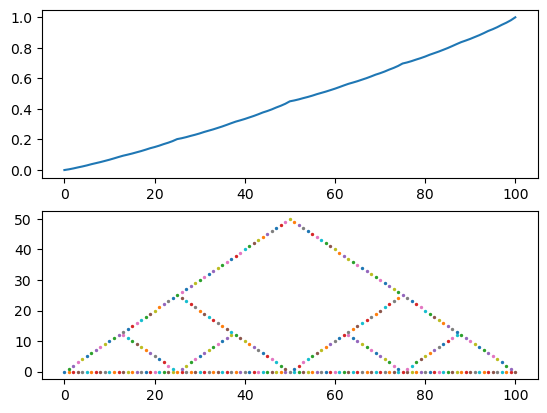

In [4]:
# The probability of getting a head
p_h = 0.45
v_star, opt_policy = value_iter(p_h)
fig, axes = plt.subplots(2)
# Plot optial value function
axes[0].plot(range(101),v_star)
# Plot optimal policy
for state, opt_action_lst in opt_policy.items():
    for opt_action in opt_action_lst:
        axes[1].scatter(state,opt_action,s = 2)
plt.show()

$p_h<\frac{1}{2}$, optimal action has binary tree structure since the optimal policy is to end the game as early as possible.

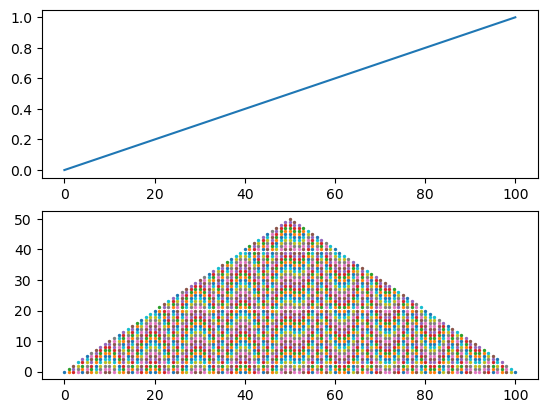

In [5]:
# The probability of getting a head
p_h = 0.5
v_star, opt_policy = value_iter(p_h)
fig, axes = plt.subplots(2)
# Plot optial value function
axes[0].plot(range(101),v_star)
# Plot optimal policy
for state, opt_action_lst in opt_policy.items():
    for opt_action in opt_action_lst:
        axes[1].scatter(state,opt_action,s = 2)
plt.show()

$p_h=\frac{1}{2}$, optimal action is indifferent among all available actions since it's a fair game.

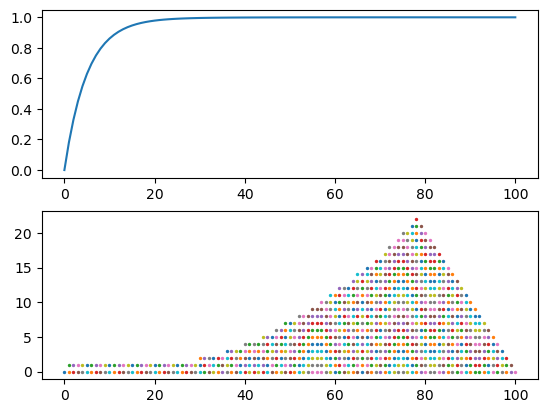

In [6]:
# The probability of getting a head
p_h = 0.55
v_star, opt_policy = value_iter(p_h)
fig, axes = plt.subplots(2)
# Plot optial value function
axes[0].plot(range(101),v_star)
# Plot optimal policy
for state, opt_action_lst in opt_policy.items():
    for opt_action in opt_action_lst:
        axes[1].scatter(state,opt_action,s = 2)
plt.show()

$p_h>\frac{1}{2}$, betting $1$ is always the optimal action since the optimal policy is to end the game as late as possible.